<center><font size="+4">Programming & Data Analytics & AI 1 2025/2026</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/jupyter/jupyterNotebooks/images/sssaLEMBEDSdtu.png" width="900" alt="L'EMbeDS"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

---

<center><font size="+4">Lecture 4: </font></center>
<center><font size="+2"> Creation of word clouds for COVID-related online news</font></center>
</center>

---

In [1]:
from IPython.display import Image, display
url_github_repo="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20252026/raw/main/PDAI/"

# Computing and visulatizing the most important words in online news

This example shows that functions can hide a lot of complexity.
* E.g., we can download remote data by just invoking a function
* In particular, in this example we will:
    1. Download all the articles from the online service [NewsAPI](https://newsapi.org/)
         - An online service is like a function running on the internet...
    2. Combine the articles into one document (`str`)
    3. Clean data
    4. Compute word-frequency pairs
        - Word 'ciao' appears 3 times, word 'hello' appears 6 times ...
    5. Visualize the analysis in a Word Cloud
    
 

*Some definitions:*

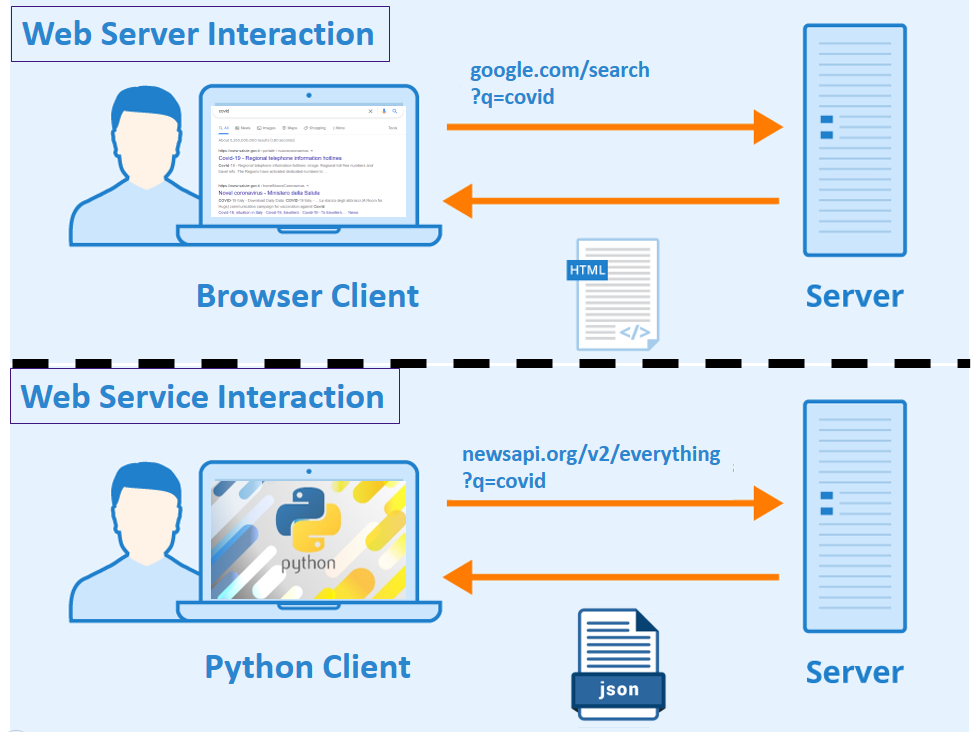

In [2]:
from IPython.display import Image, display
url_github_repo="https://github.com/EMbeDS-education/StatsAndComputing20232024/raw/main/PDAI/"
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/web_server_web_service.png',width=800)
display(img)

A **web service** is an application run by a web server (a remote computer connected to the interent). 
- The service can be called/invoked from some other computers connected to the internet 
- The service will _return_ data in a format that can't be sent over the internet
  - A little bit like a webpage, which is loaded from some remote server, and visualized in a browser
  - However, here data is not visualized but sent in a format that can be processed by programs.
  - Examples of used formats are XML (especially SOAP or so) or JSON.

An **Application Programming Interface (API)** allows two programs to communicate with one another. 
- An API defines the functions for one software program to interact with the other. 

This document has been __created by Daniele Licari__ and elaborated by Andrea Vandin.

# The modules we need to use

In [3]:
%pip install newsapi-python
%pip install wordcloud

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached charset_normalizer-3.4.4-cp314-cp314-macosx_10_13_universal2.whl.metadata (37 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.4-cp314-cp314-macosx_10_13_universal2.whl (207 kB)
Using cached idna-3.11-py3-none-any.whl (71 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [newsapi-python]
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.6/27.6 MB 75.3 kB/s  0:06:52m0:00:0100:13
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.4-cp314-cp314-macosx_10_15_universal2.whl size=238817 sha256=a64a4db93a1572d71fea28597ed72c7dc9a10f0d6cce56878e7c1cea0e068691
  Stored in directory: /Users/andreavandin/Library/

In [4]:
#We might also get some errors like 'Only supported for TrueType fonts'
#We can fix them running these installations

%pip install --upgrade pip 
%pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
# integrating News API into your Python application 
from newsapi import NewsApiClient 

# creating wordclouds into your Python application 
from wordcloud import WordCloud, STOPWORDS

#  In Python, string.punctuation will give the sets of all punctuations. 
import string

import matplotlib.pyplot as plt

In [6]:
#STOPWORDS

__NewsApiClient__ is a local client for the online service [__NewsAPI__](https://newsapi.org/) that allows you to get news from [eveywhere in the world](https://newsapi.org/sources)
* Intuitively, an online service is like an online function running in a remote server (computer)
* A local client is a piece of code runnning in your machine that communicates with the online service
  * It allows you to easily interact with the online service
  * The interaction is typically done through a set of message exchanges as prescribed by the APIs of the service
* We need a `api_key` that is a univoque identifier 
  * necessary when making requests to be identified
  * __can be obtained registering [here](https://newsapi.org/register)__

There exist many online services accessible with Python (e.g. [Twitter API](https://www.tweepy.org/))
* Most of them follow this api-key approach
* E.g. to enforce subscriptions
<!-- * In our case, __we are using a free subscription that allows us to only get the first 250 characters from a news item__ -->

# Data loading

We first get the most relevant articles (top 100) about coronavirus, published in usa-today
* This looks like a [normal function invocation](https://newsapi.org/docs/client-libraries/python)
* But under the hood a lot happens to contact the remote service 
(https://newsapi.org/v2/everything?q=coronavirus&sources=usa-today&language=en&pageSize=100&sortBy=relevancy&apiKey=1f6979fc955b465f9b076310217a19a3)

Luckily, the function `get_everything` hides this complexity to us

In [7]:
#
#Guide from:
# https://newsapi.org/docs/client-libraries/python
#

# from newsapi import NewsApiClient

# # Init
# newsapi = NewsApiClient(api_key='1f6979fc955b465f9b076310217a19a3')

# # /v2/top-headlines
# top_headlines = newsapi.get_top_headlines(q='bitcoin',
#                                           sources='bbc-news,the-verge',
#                                           category='business',
#                                           language='en',
#                                           country='us')

# # /v2/everything
# all_articles = newsapi.get_everything(q='bitcoin',
#                                       sources='bbc-news,the-verge',
#                                       domains='bbc.co.uk,techcrunch.com',
#                                       #from_param='2017-12-01',
#                                       #to='2017-12-12',
#                                       language='en',
#                                       sort_by='relevancy',
#                                       page=2)

# # /v2/top-headlines/sources
# #sources = newsapi.get_sources()

In [8]:
my_api_key='1f6979fc955b465f9b076310217a19a3'
#newsapi = NewsApiClient(api_key='345f8a0aa8c64d549fde1d8343d036f8')
newsapi = NewsApiClient(api_key=my_api_key)
json_data = newsapi.get_everything(
                                    #q='coronavirus',        # All the articles that contain this word
                                    q='covid',
                                    #q='hamas',              # All the articles that contain this word
                                    language='en',
                                    #sources = 'usa-today', # The newspaper of interest
                                    sources = 'cnn', # The newspaper of interest
                                    #sources = 'bbc-news', # The newspaper of interest
                                    #sources = 'bbc-news,the-verge'
                                    #
                                    page_size=100,           # Get 100 articles
                                    sort_by='relevancy'
                                    )
#There exist many more parameters allowing us the ask for more articles, different sources, etc

#print(json_data)

In [9]:
#json_data

The return value `json_data` is just a dictionary collecting information about the remote request

In [10]:
print(type(json_data))
print()
print(json_data.keys())
print()
print('The status of the request is',json_data['status'],'There are ',json_data['totalResults'],'articles matching the request.')
print('We got',len(json_data['articles']),'articles')
print()

<class 'dict'>

dict_keys(['status', 'totalResults', 'articles'])

The status of the request is ok There are  18 articles matching the request.
We got 18 articles



In [11]:
articles = json_data['articles']

print(type(articles))
print(type(articles[0]))
print(articles[0].keys())

<class 'list'>
<class 'dict'>
dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])


In [12]:
first_article=articles[0]
first_article

{'source': {'id': 'cnn', 'name': 'CNN'},
 'author': 'Deidre McPhillips, CNN',
 'title': 'Canada is poised to lose its measles elimination status — and the US could, too',
 'description': 'Monday marks a full year of continuous measles transmission in Canada, a milestone that’s poised to set the country back decades on a global health...',
 'url': 'https://www.cnn.com/2025/10/27/health/measles-elimination-canada-us-who',
 'urlToImage': 'https://media.zenfs.com/en/cnn_articles_875/a33f02fd4b2d2da1f28596d69fa6b7d1',
 'publishedAt': '2025-10-27T11:00:01Z',
 'content': 'Monday marks a full year of continuous measles transmission in Canada, a milestone thats poised to set the country back decades on a global health commitment. Ongoing transmission in the United State… [+8753 chars]'}

We can ignore all the metadata (i.e. the data about the remote request) and focus on the actual articles only

In [13]:
#Get the description of the first article
content = articles[0]['description']
print('The content is long',len(content),"characters")
print()
print('The content:')
print(content)

The content is long 150 characters

The content:
Monday marks a full year of continuous measles transmission in Canada, a milestone that’s poised to set the country back decades on a global health...


Now let's combine the content of all the news into variable `contents`

In [14]:
def combine_articles(list_of_articles):
    contents = ''
    for article in list_of_articles:
         #  check if key 'description' has Non-None value in dictionary 
        if article['description']:
            contents += article['description']+" "
            
    return contents

contents = combine_articles(articles)
print('Overall we have',len(contents),'characters')
contents

Overall we have 3428 characters


'Monday marks a full year of continuous measles transmission in Canada, a milestone that’s poised to set the country back decades on a global health... Australia’s flag carrier will use Airbus A350-1000ULR jets for its “Project Sunrise” service which will fly nonstop from Sydney to London and New York. Children may be more likely to be diagnosed with autism and other neurodevelopment disorders if their mother had a Covid-19 infection while pregnant, according to a new study. The Federal Reserve was widely expected to lower interest rates by a quarter point in order to support the waning job market. Patrick M. D’Aoust probably didn’t expect his anniversary trip to end early, but he definitely didn’t think he’d have just 15 minutes to vacate his room. Elon Musk launched Grokipedia – his version of Wikipedia – on Monday, as the richest man in the world further seeks to create an alternative information and media ecosystem molded to his views.\ufeff A group of Democrats and one Democratic-

# Data cleaning, manipulation and visualization 

## Implementing two functions for data cleaning

__Stop words__ are usually the most common words in any text ( like “the”, “of”, “to” and “and”), 
* They don’t tell us much about the actual content in a text
* These are the words we want to ignore - this is our data cleaning

We want to find the words that will help us differentiate a text from texts that are about different subjects. 
* __We will filter out the common words__.
* Of course, we are going to use a function for doing this

Furthermore, we want to ignore punctuation 
* In Python, string.punctuation will give the all sets of punctuation.
* We are going to use it to delete all punctuation from a string

In [15]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
# to remove STOPWORDS from a list of strings
def remove_stopwords(wordlist):
    return [ w for w in wordlist if w not in STOPWORDS ]

# to remove Punctuations from a string
def remove_punctuations(my_str): 
    no_punct = ""
    for char in my_str:
        if char  not in string.punctuation:
            no_punct = no_punct + char
    return no_punct

In [18]:
# for testing 
remove_punctuations('Andrea likes pizza and Python!! and you? . ' + "ciao")

'Andrea likes pizza and Python and you  ciao'

In [19]:
no_punct=remove_punctuations('Andrea likes pizza and Python!! and you? . ' + "ciao")
print(no_punct)
no_punct.split()

Andrea likes pizza and Python and you  ciao


['Andrea', 'likes', 'pizza', 'and', 'Python', 'and', 'you', 'ciao']

In [20]:
remove_stopwords(
    remove_punctuations('Andrea likes pizza and Python!! and you? . ' + "ciao").split()
    )

['Andrea', 'likes', 'pizza', 'Python', 'ciao']

## Actual cleaning, manipulation, visualization

Now begins the funny part
1. Let's clean the data removing not interesting words
2. Let's compute the frequency of use of words
3. Let's visualize graphically the computed analysis - Word Cloud

In [21]:
#contents

In [22]:
# 1 cleaning data
def clean_data(content_to_clean):
    print('Before cleaning')
    print(content_to_clean[:200])
    print()
    # simple text normalization: string in lower case
    content_to_clean = content_to_clean.lower()
    # remove punctuations
    cleaned_content = remove_punctuations(content_to_clean)
    # remove stopwords
    #   split the string in a list of words
    cleaned_content_words = cleaned_content.split()
    #   remove stop_words
    cleaned_content_words = remove_stopwords(cleaned_content_words)
    print('After cleaning')
    print(cleaned_content_words[:200])
    print()
    return cleaned_content_words

cleaned_content = clean_data(contents)
#cleaned_content

Before cleaning
Monday marks a full year of continuous measles transmission in Canada, a milestone that’s poised to set the country back decades on a global health... Australia’s flag carrier will use Airbus A350-100

After cleaning
['monday', 'marks', 'full', 'year', 'continuous', 'measles', 'transmission', 'canada', 'milestone', 'that’s', 'poised', 'set', 'country', 'back', 'decades', 'global', 'health', 'australia’s', 'flag', 'carrier', 'will', 'use', 'airbus', 'a3501000ulr', 'jets', '“project', 'sunrise”', 'service', 'will', 'fly', 'nonstop', 'sydney', 'london', 'new', 'york', 'children', 'may', 'likely', 'diagnosed', 'autism', 'neurodevelopment', 'disorders', 'mother', 'covid19', 'infection', 'pregnant', 'according', 'new', 'study', 'federal', 'reserve', 'widely', 'expected', 'lower', 'interest', 'rates', 'quarter', 'point', 'order', 'support', 'waning', 'job', 'market', 'patrick', 'm', 'd’aoust', 'probably', 'didn’t', 'expect', 'anniversary', 'trip', 'end', 'early', 'definitely',

In [23]:
# 2 computing word-frequency pairs
def analyze_data(cleaned_content):
    wordcount = {}
    for w in cleaned_content:
        if w in wordcount:
            #wordcount[w] += 1
            wordcount[w] = wordcount[w] + 1
        else:
            wordcount[w] = 1
    return wordcount

#wordcount = analyze_data(['ciao','ciao','andrea'])
wordcount = analyze_data(cleaned_content)
wordcount

{'monday': 3,
 'marks': 1,
 'full': 1,
 'year': 2,
 'continuous': 1,
 'measles': 1,
 'transmission': 1,
 'canada': 2,
 'milestone': 1,
 'that’s': 2,
 'poised': 1,
 'set': 1,
 'country': 1,
 'back': 1,
 'decades': 2,
 'global': 1,
 'health': 2,
 'australia’s': 1,
 'flag': 1,
 'carrier': 1,
 'will': 4,
 'use': 1,
 'airbus': 1,
 'a3501000ulr': 1,
 'jets': 1,
 '“project': 1,
 'sunrise”': 1,
 'service': 1,
 'fly': 1,
 'nonstop': 1,
 'sydney': 1,
 'london': 1,
 'new': 4,
 'york': 1,
 'children': 1,
 'may': 2,
 'likely': 1,
 'diagnosed': 1,
 'autism': 1,
 'neurodevelopment': 1,
 'disorders': 1,
 'mother': 1,
 'covid19': 1,
 'infection': 1,
 'pregnant': 1,
 'according': 2,
 'study': 1,
 'federal': 1,
 'reserve': 1,
 'widely': 1,
 'expected': 1,
 'lower': 1,
 'interest': 1,
 'rates': 1,
 'quarter': 1,
 'point': 1,
 'order': 2,
 'support': 1,
 'waning': 1,
 'job': 1,
 'market': 1,
 'patrick': 1,
 'm': 1,
 'd’aoust': 1,
 'probably': 1,
 'didn’t': 2,
 'expect': 1,
 'anniversary': 1,
 'trip': 1,
 '

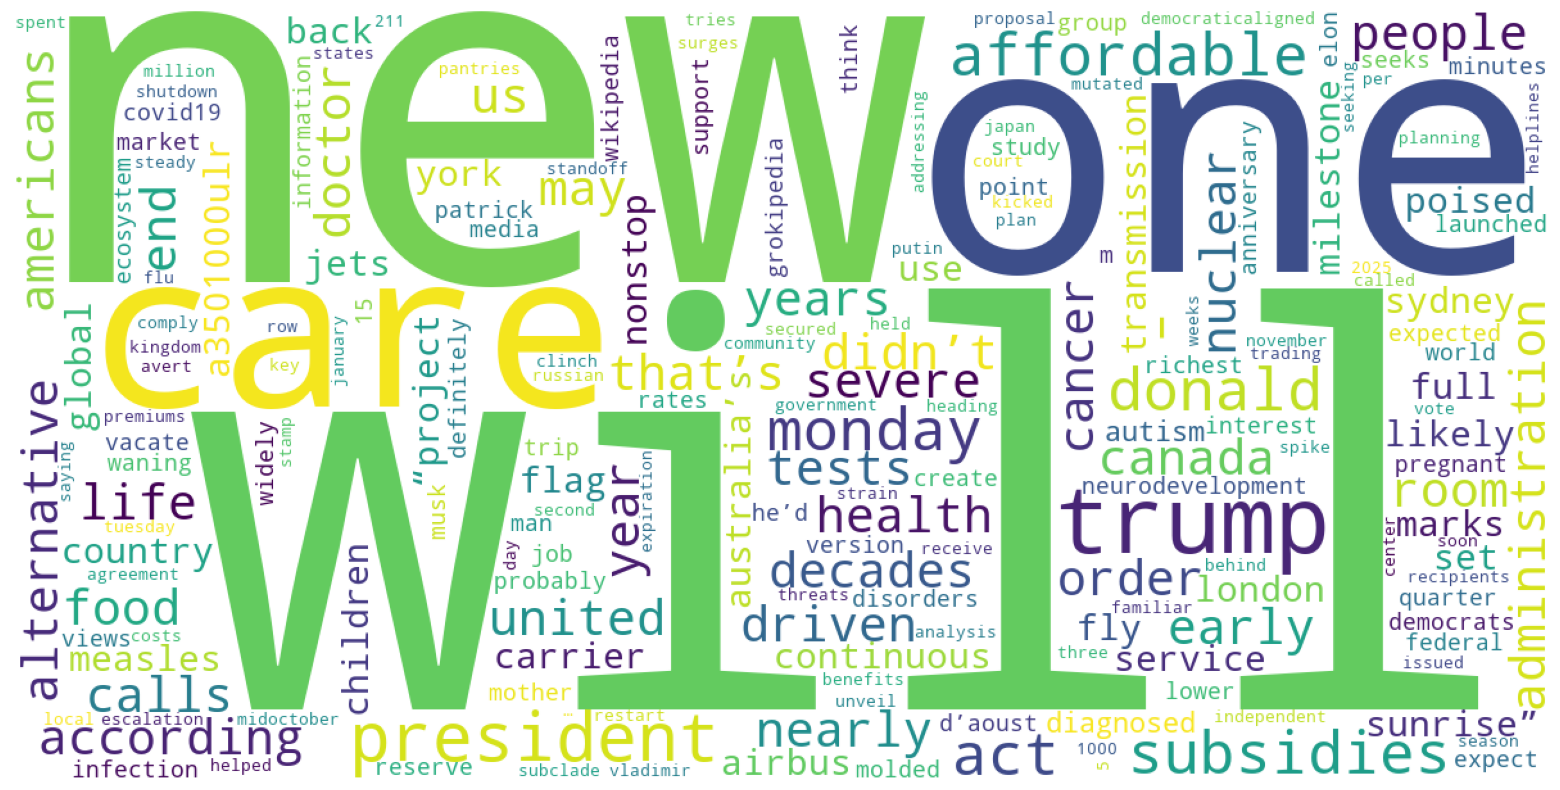

In [24]:
# 3 visualizing the analysisis in a Word Cloud
def visualize_data(wordcount):
    wordCloudMaker=WordCloud(width=1200,height=600, background_color='white')
    wc = wordCloudMaker.generate_from_frequencies(wordcount)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

visualize_data(wordcount)

# Let's put everything in a function, so that we can run it easily for different sources

In [25]:
def make_world_cloud(query,source,n_articles=50):
    """
    Download relevant 'n_article' articles that contain 'query' from 'source' newspaper using NewsAPI
    and plot a wordcloud with the most common words in the corpus.
    :param query: 
        Keywords or phrases to search for in the article title and body.
    :param source: 
        the news source or blog you want headlines from
    :param n_articles:
        The number of articles to return (maximum 100)
    """
    # 1.  Download all the articles the online service NewsAPI
    newsapi = NewsApiClient(api_key=my_api_key)
    json_data = newsapi.get_everything(q=query,           # All the articles that contain this word
                                       language='en',
                                       sources=source,      # The newspaper of interest
                                       page_size=n_articles,  # Get 50 articles (by default)
                                       sort_by='relevancy'
                                    )
    
    # 2. Combine the articles into one document (string)
    contents = combine_articles(json_data['articles'])
    
    # 3. cleaning data
    cleaned_content = clean_data(contents)

    # 4. computing word-frequency pairs
    wordcount = analyze_data(cleaned_content)
 
    # 5. Visualizing the analysis in a Word Cloud
    visualize_data(wordcount)

In [26]:
help(make_world_cloud)

Help on function make_world_cloud in module __main__:

make_world_cloud(query, source, n_articles=50)
    Download relevant 'n_article' articles that contain 'query' from 'source' newspaper using NewsAPI
    and plot a wordcloud with the most common words in the corpus.
    :param query:
        Keywords or phrases to search for in the article title and body.
    :param source:
        the news source or blog you want headlines from
    :param n_articles:
        The number of articles to return (maximum 100)



Before cleaning
British commentator Sami Hamdi was detained on Sunday by federal immigration officers during a speaking tour in the United States, in what a Muslim advocacy ... Radiohead singer Thom Yorke has said he

After cleaning
['british', 'commentator', 'sami', 'hamdi', 'detained', 'sunday', 'federal', 'immigration', 'officers', 'speaking', 'tour', 'united', 'states', 'muslim', 'advocacy', 'radiohead', 'singer', 'thom', 'yorke', 'said', 'longer', 'perform', 'israel', 'band', 'came', 'scrutiny', 'playing', 'tel', 'aviv', '2017', 'israeli', 'authorities', 'said', 'monday', 'received', 'coffin', 'deceased', 'hostage', 'gaza', 'austria’s', 'domestic', 'intelligence', 'service', 'uncovered', 'weapons', 'cache', 'vienna', 'believed', 'linked', 'palestinian', 'militant', 'group', 'hamas', 'use', '“possible', 'terrorist', 'attacks', 'europe”', 'government', 'said', 'thursday', 'prime', 'minister', 'benjamin', 'netanyahu', 'tuesday', 'ordered', 'israeli', 'military', 'carry', '“immediate'

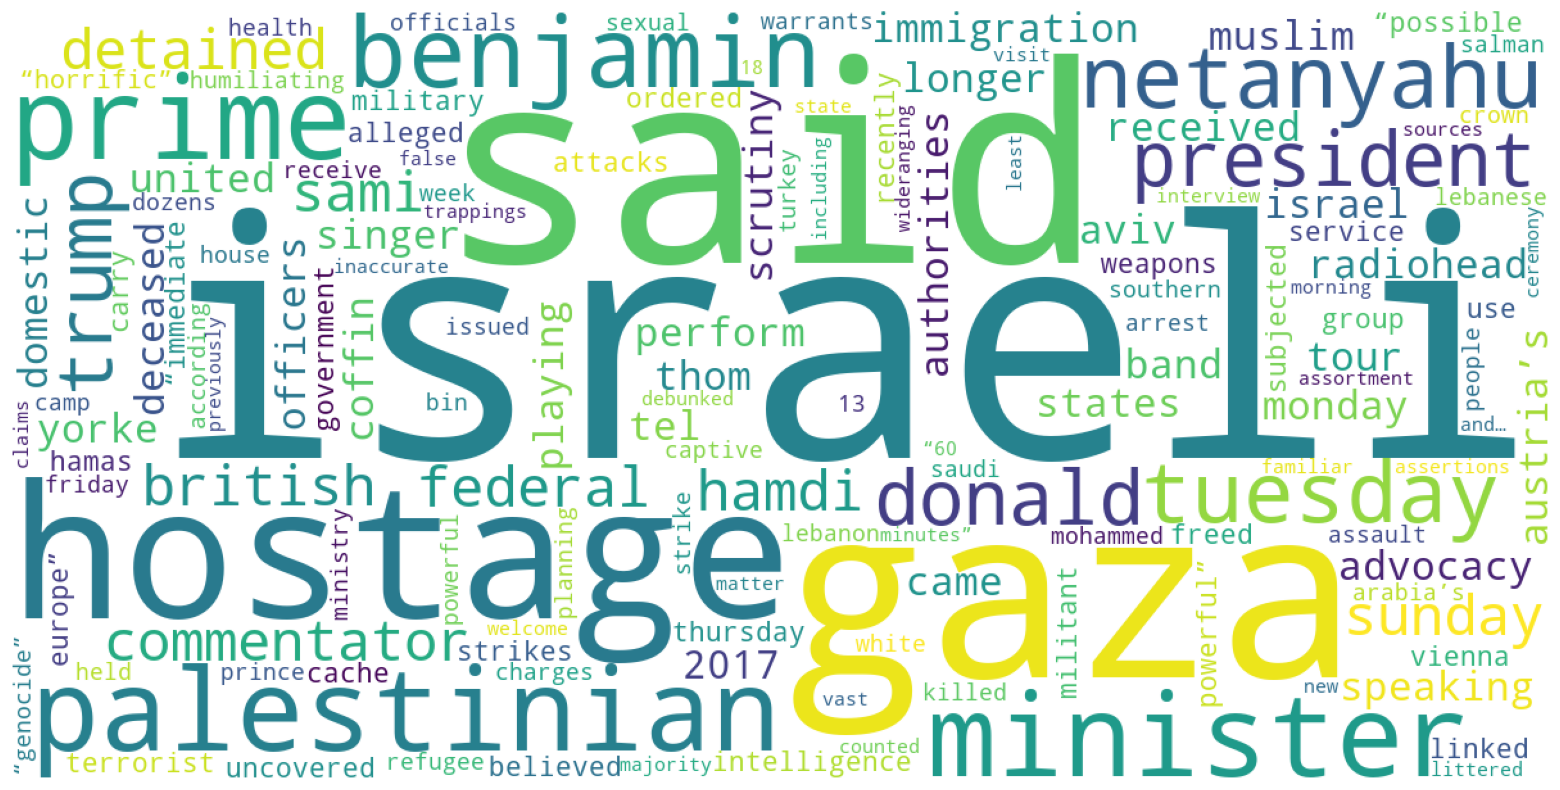

In [27]:
#make_world_cloud('coronavirus','the-verge',100)
make_world_cloud('hamas','cnn',100)

Before cleaning
Hurricane Melissa has made landfall in Jamaica - its most powerful storm since records began. The US National Hurricane Centre said the eye hit the southwest of the island with estimated maximum wind 

After cleaning
['hurricane', 'melissa', 'made', 'landfall', 'jamaica', 'powerful', 'storm', 'records', 'began', 'us', 'national', 'hurricane', 'centre', 'said', 'eye', 'hit', 'southwest', 'island', 'estimated', 'maximum', 'wind', 'speeds', 'close', 'three', 'hundred', 'kilometres', 'hour', 'in…', 'entire', 'neighbourhoods', 'controlled', 'israel', 'levelled', 'less', 'month', 'images', 'show', 'maj', 'gen', 'yifat', 'tomeryerushalmi', 'resigned', 'friday', 'admitting', 'leaking', 'video', 'allegedly', 'showing', 'abuse', 'palestinian', 'detainee']



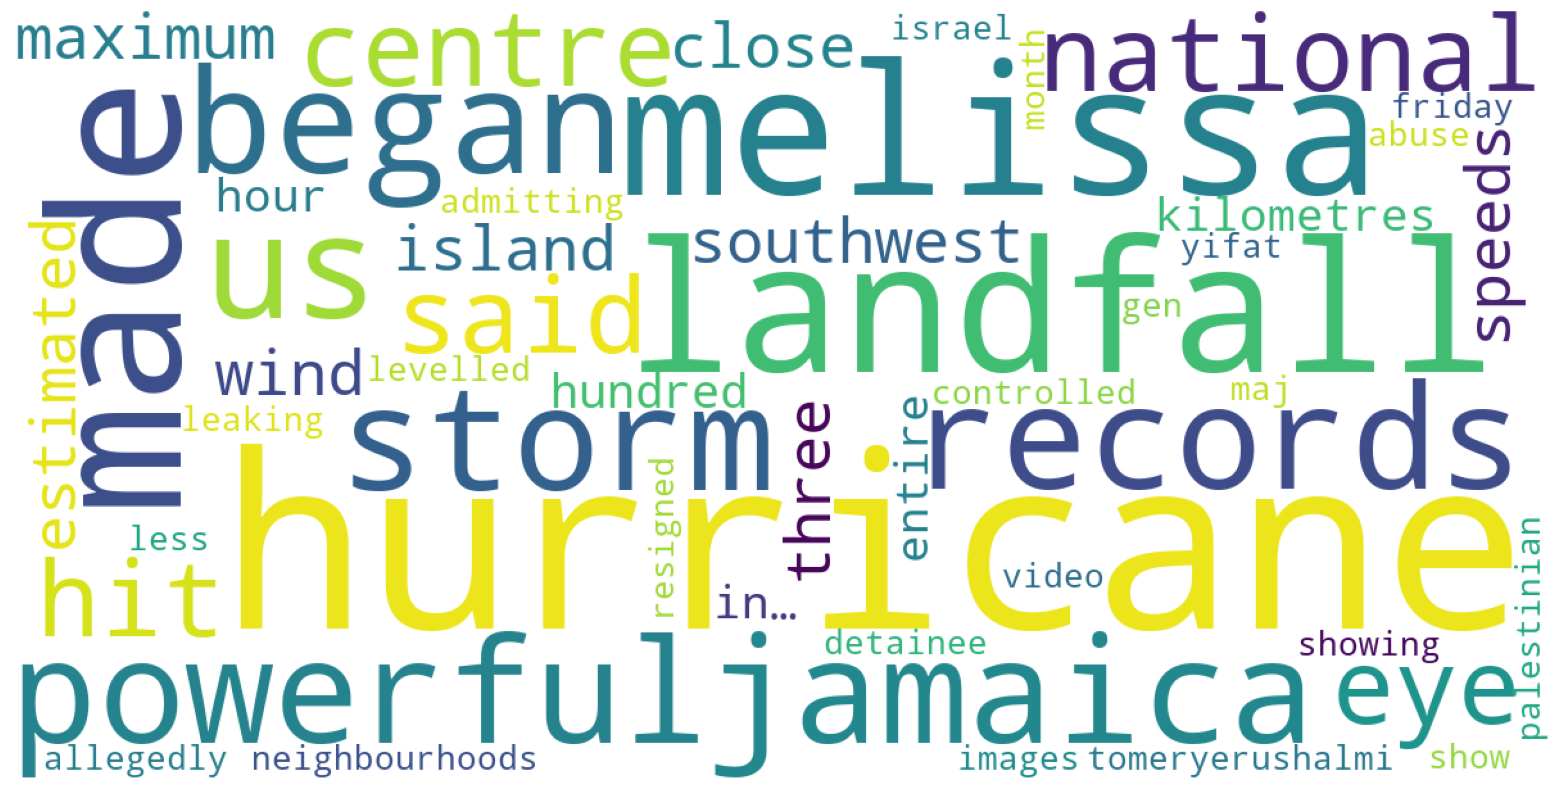

In [28]:
make_world_cloud('hamas','bbc-news',100)

Before cleaning
Sixteen European teams will battle for four spots in the 2026 World Cup. See the pairings for the matches next March. Europe will have 16 representative sin the 2026 World Cup and four are still up fo

After cleaning
['sixteen', 'european', 'teams', 'will', 'battle', 'four', 'spots', '2026', 'world', 'cup', 'see', 'pairings', 'matches', 'next', 'march', 'europe', 'will', '16', 'representative', 'sin', '2026', 'world', 'cup', 'four', 'still', 'grabs', '42', 'teams', 'qualified', 'three', 'countries', 'set', 'make', 'debut', 'big', 'stage', 'first', 'time', 'five', 'weeks', 'commanders', 'held', 'lead', 'one', 'several', 'factsnumbers', 'week', '11', '2026', 'world', 'cups', '48', 'spots', '30', 'already', 'claimed', 'secured', 'qualifiers', 'take', 'place', 'november', 'blanca', 'quiñonez', 'named', 'big', 'east', 'freshman', 'week', 'averaging', '115', 'points', '25', 'rebounds', '2', 'assists', '15', 'steals', 'first', 'two', 'games', 'walters', 'golf’s', 'version', 'm

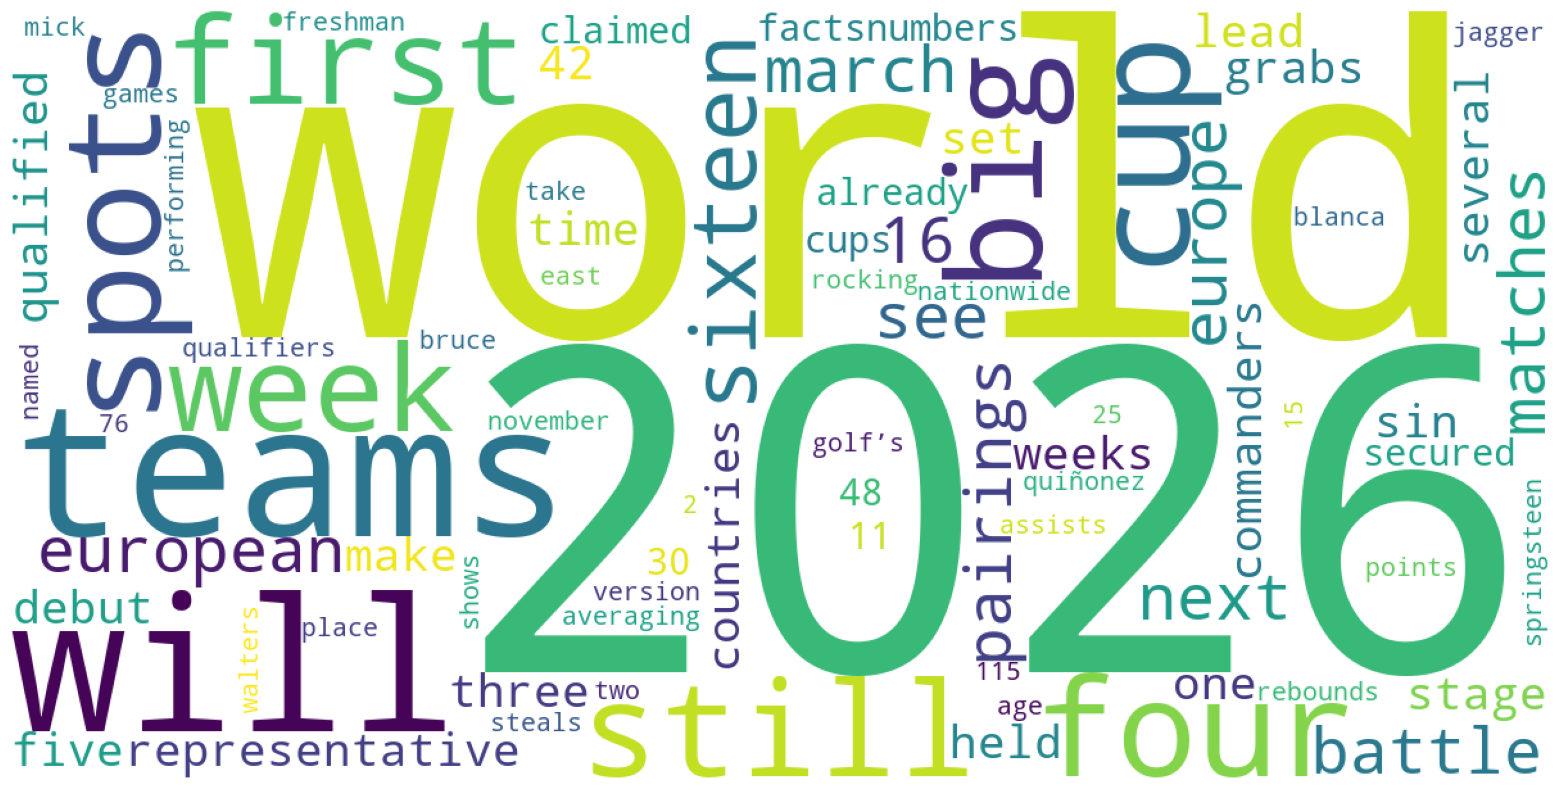

In [29]:
make_world_cloud("italy",'usa-today',100)

Before cleaning
British commentator Sami Hamdi was detained on Sunday by federal immigration officers during a speaking tour in the United States, in what a Muslim advocacy ... Radiohead singer Thom Yorke has said he

After cleaning
['british', 'commentator', 'sami', 'hamdi', 'detained', 'sunday', 'federal', 'immigration', 'officers', 'speaking', 'tour', 'united', 'states', 'muslim', 'advocacy', 'radiohead', 'singer', 'thom', 'yorke', 'said', 'longer', 'perform', 'israel', 'band', 'came', 'scrutiny', 'playing', 'tel', 'aviv', '2017', 'hurricane', 'melissa', 'made', 'landfall', 'jamaica', 'powerful', 'storm', 'records', 'began', 'us', 'national', 'hurricane', 'centre', 'said', 'eye', 'hit', 'southwest', 'island', 'estimated', 'maximum', 'wind', 'speeds', 'close', 'three', 'hundred', 'kilometres', 'hour', 'in…', 'israeli', 'authorities', 'said', 'monday', 'received', 'coffin', 'deceased', 'hostage', 'gaza', 'austria’s', 'domestic', 'intelligence', 'service', 'uncovered', 'weapons', 'cach

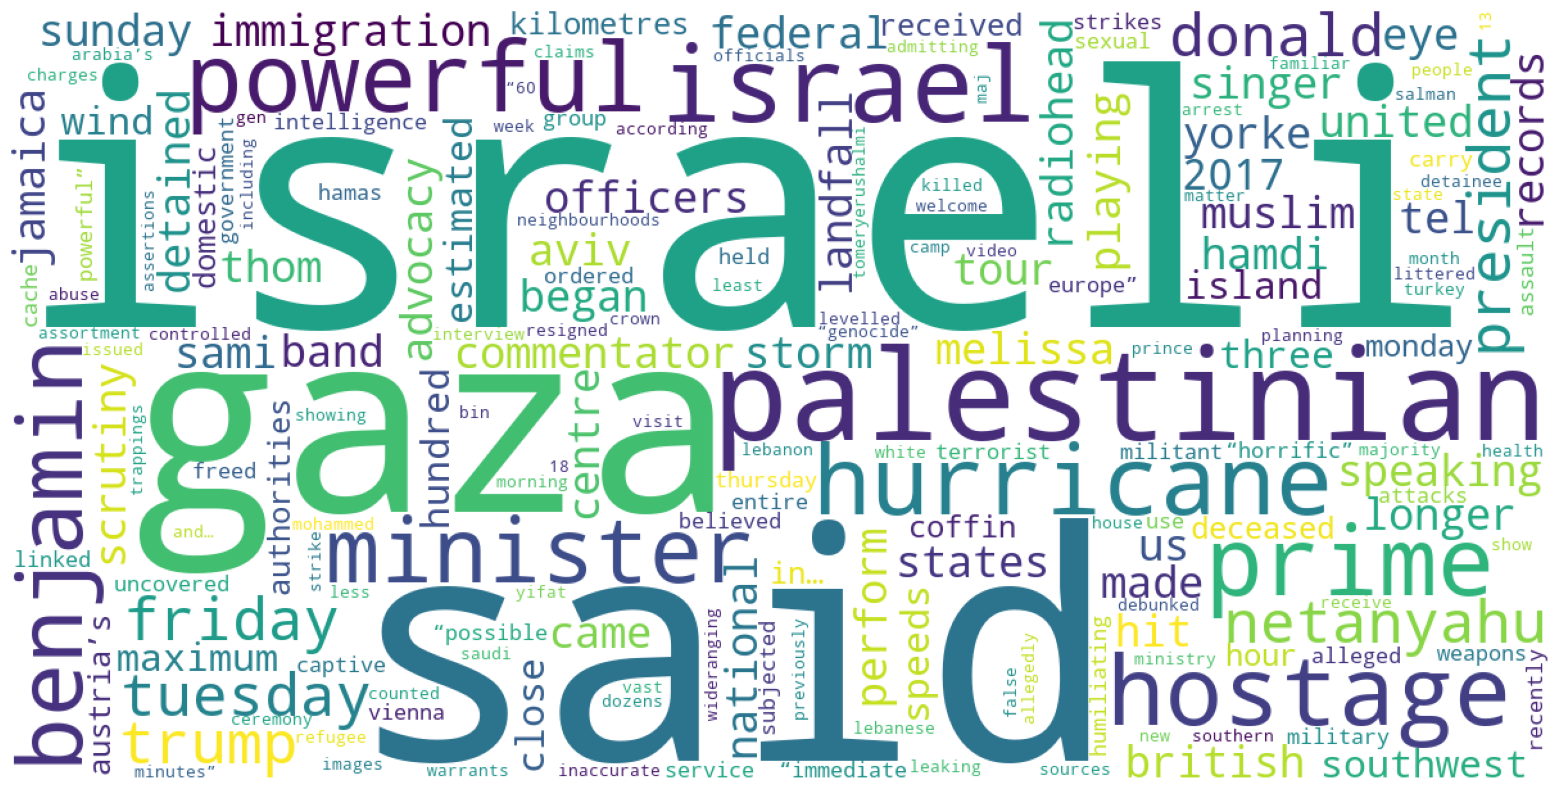

In [30]:
make_world_cloud('hamas','cnn,bbc-news',100)

Before cleaning
Hurricane Melissa has made landfall in Jamaica - its most powerful storm since records began. The US National Hurricane Centre said the eye hit the southwest of the island with estimated maximum wind 

After cleaning
['hurricane', 'melissa', 'made', 'landfall', 'jamaica', 'powerful', 'storm', 'records', 'began', 'us', 'national', 'hurricane', 'centre', 'said', 'eye', 'hit', 'southwest', 'island', 'estimated', 'maximum', 'wind', 'speeds', 'close', 'three', 'hundred', 'kilometres', 'hour', 'in…', 'entire', 'neighbourhoods', 'controlled', 'israel', 'levelled', 'less', 'month', 'images', 'show', 'maj', 'gen', 'yifat', 'tomeryerushalmi', 'resigned', 'friday', 'admitting', 'leaking', 'video', 'allegedly', 'showing', 'abuse', 'palestinian', 'detainee']



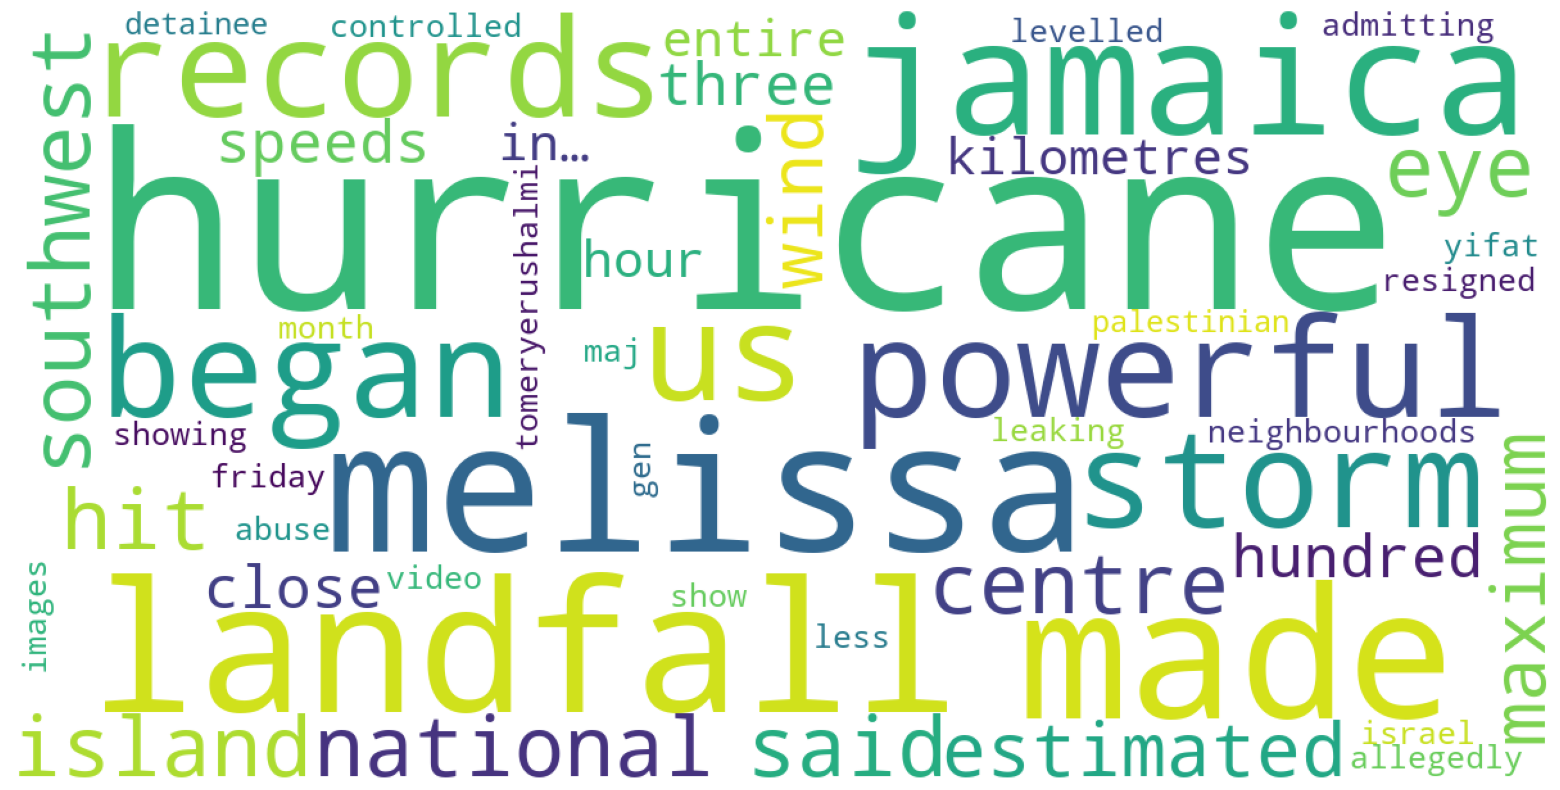

In [31]:
#make_world_cloud('hamas','ars-technica',100)
#make_world_cloud('geopolitics','bbc-news',100)
make_world_cloud('hamas','bbc-news',100)
#make_world_cloud('covid','cnn',100)